In [1]:
import seaborn as sns

# Data structures accepted by seaborn

데이터 시각화 라이브러리인 seaborn은 사용자가 데이터를 제공해야 합니다.

이 장에서는 그 작업을 수행하는 다양한 방법을 설명합니다.

Seaborn은 여러 가지 데이터 세트 형식을 지원하며, 대부분의 함수는 리스트나 딕셔너리와 같은 기본 제공 Python 유형뿐만 아니라 pandas 또는 numpy 라이브러리의 객체로 표현된 데이터를 받아들입니다.

이러한 다양한 옵션과 관련된 사용 패턴을 이해하면 거의 모든 데이터 집합에 대해 유용한 시각화를 신속하게 만드는 데 도움이 됩니다.

## Long-form vs. wide-form data

seaborn의 대부분의 플로팅 함수는 데이터의 벡터를 지향합니다.

x를 y에 대해 플롯할 때 각 변수는 벡터여야 합니다.

Seaborn은 표 형식으로 구성된 둘 이상의 벡터가 있는 데이터 집합을 허용합니다.

"long-form" 데이터 테이블과 "wide-form" 데이터 테이블에는 근본적인 차이가 있으며, Seaborn은 각각을 다르게 처리합니다.

### Long-form data

긴 형식의 데이터 테이블에는 다음과 같은 특징이 있습니다:

* 각 변수는 열이다.

* 각 관측값은 행이다.

간단한 예로, 1949년부터 1960년까지 매월 비행기를 이용한 항공사 승객 수를 기록하는 'flights' 데이터 집합을 살펴보겠습니다. 이 데이터 집합에는 세 가지 변수(연도, 월 및 승객 수)가 있습니다:

In [2]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


long-form의 데이터에서는 테이블의 열을 변수 중 하나에 명시적으로 할당하여 플롯에서 열에 역할을 부여합니다.

예를 들어 연간 승객 수의 월별 플롯을 만들면 다음과 같습니다:

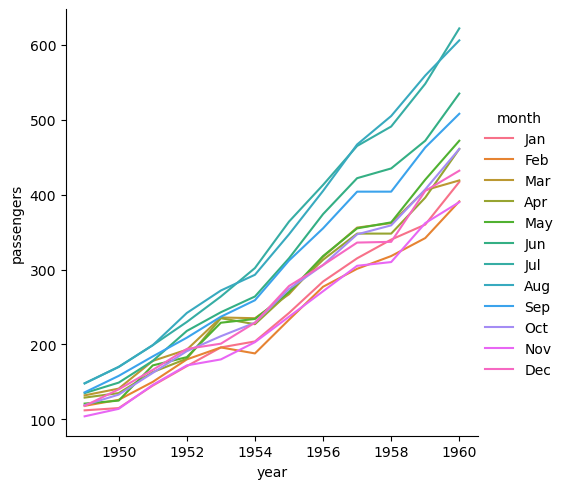

In [5]:
sns.relplot(data=flights, x="year", y="passengers", hue="month", kind="line")

long-form의 데이터의 장점은 플롯을 이렇게 명시적으로 지정하는 데 적합하다는 것입니다.

변수와 관측값을 명확하게 정의할 수 있는 한, 임의의 복잡한 데이터 집합도 수용할 수 있습니다.

그러나 이 형식은 머릿속에 있는 데이터 모델과 다른 경우가 많기 때문에 익숙해지는 데 다소 시간이 걸립니다.

### Wide-form data

간단한 데이터 집합의 경우, 열과 행에 다양한 변수의 수준이 포함되어 있는 스프레드시트에서 볼 수 있는 방식으로 데이터를 생각하는 것이 더 직관적인 경우가 많습니다.

예를 들어, 항공편 데이터 집합을 '피벗'하여 각 열이 수년에 걸친 월별 시계열을 갖도록 함으로써 와이드 폼 조직으로 변환할 수 있습니다:

In [3]:
flights.head(3)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132


In [4]:
flights_wide = flights.pivot(index="year", columns="month", values="passengers")
flights_wide.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


여기에는 동일한 세 개의 변수가 있지만 구성이 다르게 되어 있습니다.

이 데이터 집합의 변수는 명명된 필드가 아니라 테이블의 차원에 연결됩니다.

각 관측값은 테이블의 셀에 있는 값과 행 및 열 인덱스에 대한 해당 셀의 좌표 모두로 정의됩니다.

긴 형식의 데이터에서는 데이터 집합의 변수에 이름으로 액세스할 수 있습니다. 와이드 폼 데이터는 그렇지 않습니다.

그럼에도 불구하고 테이블의 차원과 데이터 집합의 변수 간에 명확한 연관성이 있기 때문에 seaborn은 플롯에서 해당 변수에 역할을 할당할 수 있습니다.


- **주의** : Seaborn은 데이터에 대한 argument가 x나 y가 지정되지 않은 경우 와이드 형식으로 처리합니다.

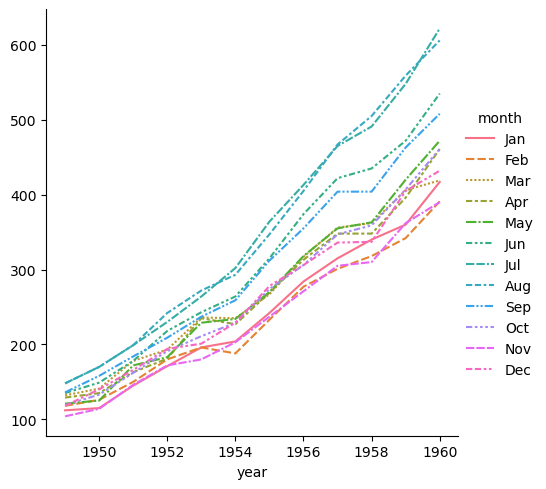

In [5]:
sns.relplot(data=flights_wide, kind="line")